In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score


In [2]:
train_data = pd.read_csv('./train.csv')
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

### EDA

In [3]:
train_data.head(2)

ClientPeriod  MonthlySpending TotalSpent   Sex  IsSeniorCitizen HasPartner  \
0            55            19.50    1026.35  Male                0        Yes   
1            72            25.85     1872.2  Male                0        Yes   

  HasChild HasPhoneService HasMultiplePhoneNumbers HasInternetService  \
0      Yes             Yes                      No                 No   
1       No             Yes                     Yes                 No   

  HasOnlineSecurityService      HasOnlineBackup  HasDeviceProtection  \
0      No internet service  No internet service  No internet service   
1      No internet service  No internet service  No internet service   

  HasTechSupportAccess          HasOnlineTV HasMovieSubscription  \
0  No internet service  No internet service  No internet service   
1  No internet service  No internet service  No internet service   

  HasContractPhone IsBillingPaperless            PaymentMethod  Churn  
0         One year                 No             Mailed check      0  
1         Two year                 No  Credit card (automatic)      0

In [4]:
train_data.shape

(5282, 20)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

### Analysis of numeric columns

In [7]:
train_data = train_data.mask(train_data == ' ')

In [8]:
train_data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [9]:
train_data[train_data['TotalSpent'].isna()]

ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
1048             0            25.75        NaN    Male                0   
1707             0            73.35        NaN  Female                0   
2543             0            19.70        NaN    Male                0   
3078             0            80.85        NaN  Female                0   
3697             0            20.00        NaN  Female                0   
4002             0            61.90        NaN    Male                0   
4326             0            25.35        NaN    Male                0   
4551             0            52.55        NaN  Female                0   
4598             0            56.05        NaN  Female                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
1048        Yes      Yes             Yes                     Yes   
1707        Yes      Yes             Yes                     Yes   
2543        Yes      Yes             Yes                      No   
3078        Yes      Yes             Yes                      No   
3697        Yes      Yes             Yes                      No   
4002         No      Yes             Yes                     Yes   
4326        Yes      Yes             Yes                     Yes   
4551        Yes      Yes              No        No phone service   
4598        Yes      Yes              No        No phone service   

     HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
1048                 No      No internet service  No internet service   
1707                DSL                       No                  Yes   
2543                 No      No internet service  No internet service   
3078                DSL                      Yes                  Yes   
3697                 No      No internet service  No internet service   
4002                DSL                      Yes                  Yes   
4326                 No      No internet service  No internet service   
4551                DSL                      Yes                   No   
4598                DSL                      Yes                  Yes   

      HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
1048  No internet service  No internet service  No internet service   
1707                  Yes                  Yes                  Yes   
2543  No internet service  No internet service  No internet service   
3078                  Yes                   No                  Yes   
3697  No internet service  No internet service  No internet service   
4002                   No                  Yes                   No   
4326  No internet service  No internet service  No internet service   
4551                  Yes                  Yes                  Yes   
4598                  Yes                  Yes                  Yes   

     HasMovieSubscription HasContractPhone IsBillingPaperless  \
1048  No internet service         Two year                 No   
1707                   No         Two year                 No   
2543  No internet service         One year                Yes   
3078                  Yes         Two year                 No   
3697  No internet service         Two year                 No   
4002                   No         Two year                Yes   
4326  No internet service         Two year                 No   
4551                   No         Two year                Yes   
4598                   No         Two year                 No   

                  PaymentMethod  Churn  
1048               Mailed check      0  
1707               Mailed check      0  
2543               Mailed check      0  
3078               Mailed check      0  
3697               Mailed check      0  
4002  Bank transfer (automatic)      0  
4326               Mailed check      0  
4551  Bank transfer (automatic)      0  
4598    Credit card (automatic)      0

In [10]:
train_data['TotalSpent'] = train_data['TotalSpent'].fillna(0)
train_data['TotalSpent'] = train_data['TotalSpent'].astype('float64')

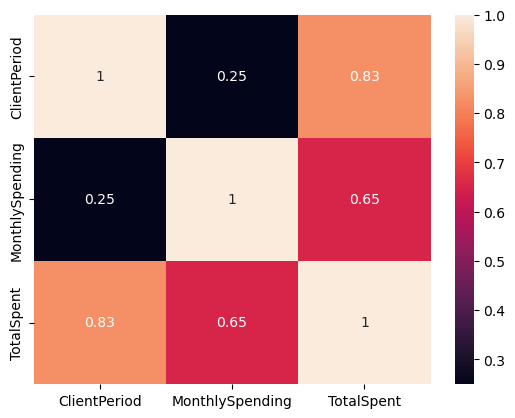

In [11]:
sns.heatmap(train_data[num_cols].corr(), annot=True);

In [12]:
train_data[num_cols].describe()

ClientPeriod  MonthlySpending   TotalSpent
count   5282.000000      5282.000000  5282.000000
mean      32.397009        64.924754  2287.486161
std       24.550326        30.176464  2269.049195
min        0.000000        18.250000     0.000000
25%        9.000000        35.462500   395.725000
50%       29.000000        70.400000  1405.650000
75%       55.000000        90.050000  3795.212500
max       72.000000       118.750000  8684.800000

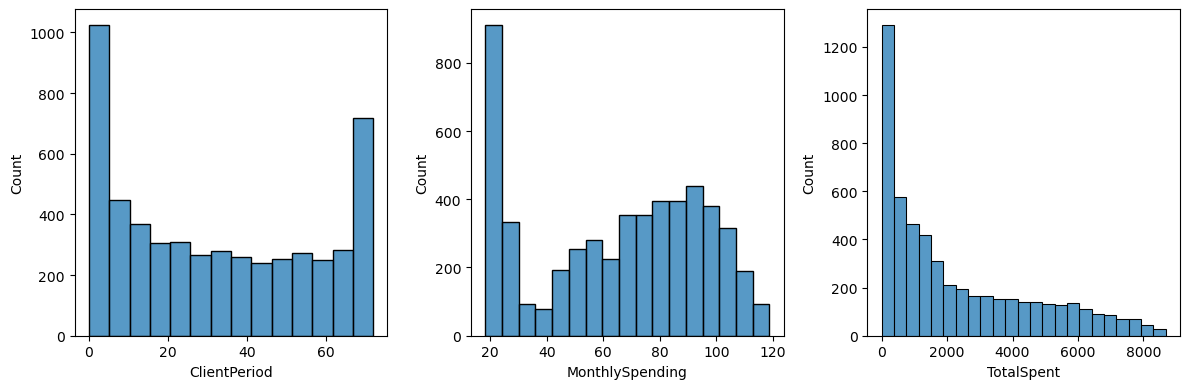

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))  

for col, subplots in zip (num_cols, ax.flatten()):  
    sns.histplot(data=train_data, x=col, ax=subplots)
    
fig.tight_layout()
plt.show()

### Analysis of categorical columns

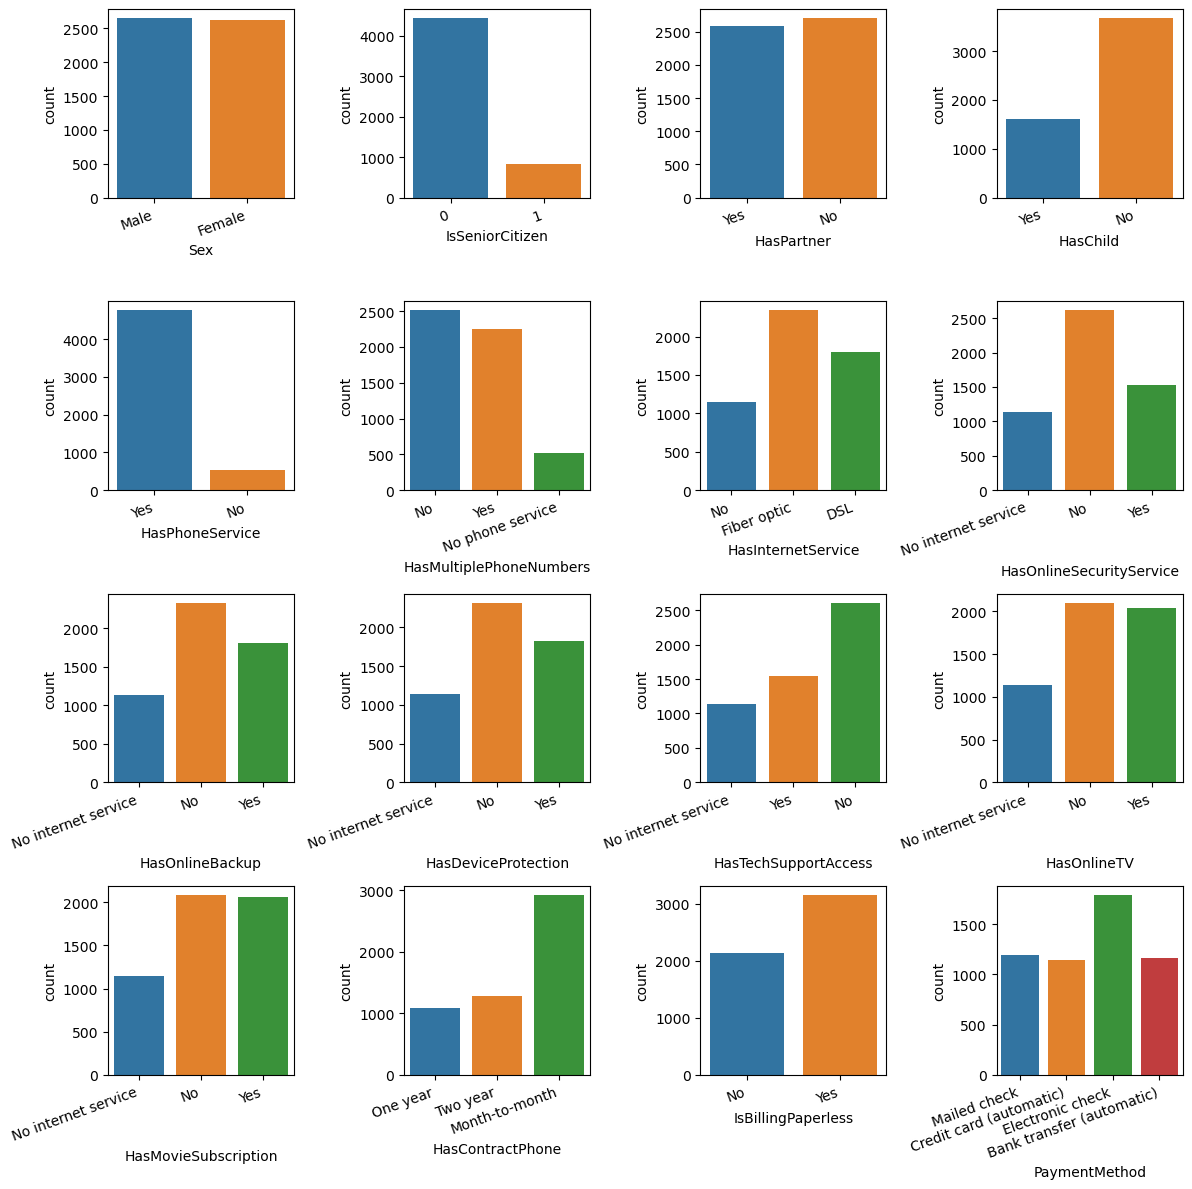

In [14]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))  

for col, subplots in zip (cat_cols, ax.flatten()):  
    plot = sns.countplot(train_data, x=col, ax=subplots)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=20,
                        horizontalalignment='right')
    
fig.tight_layout()
plt.show()

### Analysis of target column

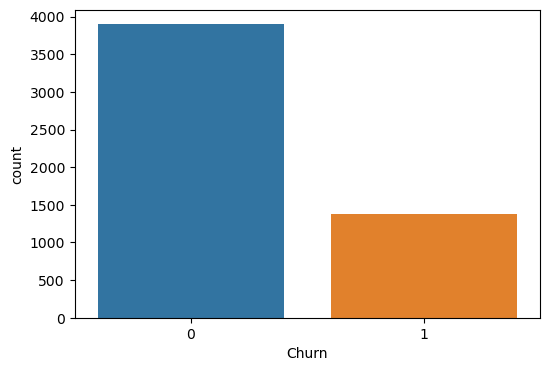

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(train_data, x=target_col);

In [16]:
train_data[target_col].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

### Logistic Regression - baseline

In [17]:
X, y = train_data[feature_cols], train_data[target_col]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
columnTransformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_cols),
        ('num', StandardScaler(), num_cols)
    ])

In [19]:
clf = make_pipeline(columnTransformer, LogisticRegression())
clf.fit(X_train, y_train)
y_scores = clf.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_scores)

0.8287603550022627

### Optimizing Logistic Regression

In [20]:
param_space = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
               'logisticregression__max_iter': [1000]
              }

grid = GridSearchCV(clf, 
                    param_space, 
                    n_jobs=-1,
                    cv=5, 
                    refit=True,
                    scoring='roc_auc')

grid_result = grid.fit(X_train, y_train)
grid_result.best_params_

{'logisticregression__C': 100, 'logisticregression__max_iter': 1000}

In [21]:
roc_auc_score(y_val, grid_result.best_estimator_.predict_proba(X_val)[:, 1])

0.8268532798921324

### Catboost

In [22]:
from catboost import CatBoostClassifier

In [23]:
catb = CatBoostClassifier()
catb.fit(X_train, y_train, cat_features=cat_cols, verbose=False)
y_scores = catb.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_scores)

0.823387759625419

### Optimizing Catboost

In [24]:
def hyperopt_catboost(X_train, y_train, X_val, y_val, params_space):

    def objective(params):
        model = CatBoostClassifier(**params)
        model.fit(X_train, y_train)
        score_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
        
        y_val_pred = model.predict_proba(X_val)[:, 1]
        score_val = roc_auc_score(y_val, y_val_pred)
        score_val = 1 - score_val

        return {"loss": score_val, "score_train": score_train, "model": model, "status": STATUS_OK}

    trials = Trials()
    
    best_params = fmin(
        objective,
        space=params_space,
        algo=tpe.suggest,
        max_evals=3,
        trials=trials
    )
    
    best_metrics = sorted(trials._dynamic_trials, key=lambda x: x["result"]["loss"])[0]["result"]

    current_val_score = 1 - best_metrics["loss"]
    history = {
        "best_params": best_params,
        "roc_auc_val": current_val_score,
        "roc_auc_val_train": best_metrics["score_train"],
        "model": best_metrics["model"],
    }
    
    return (
        best_metrics["model"],
        current_val_score,
        history
    )

In [25]:
from hyperopt import fmin, tpe, hp, STATUS_OK, rand, Trials

params_space = {
    'learning_rate': hp.uniform('learning_rate', 1e-3, 0.1),
    'depth': hp.randint('depth', 1, 11),
    'subsample': hp.quniform('subsample', 0.1, 1, 0.1),
    "colsample_bylevel": hp.quniform('colsample_bylevel', 0.1, 1, 0.1),
    'min_data_in_leaf': hp.randint('min_data_in_leaf', 1, 100),
    'cat_features': cat_cols,
    'random_seed': 42,
    'verbose': False
}

In [26]:
catboost_optimized = hyperopt_catboost(X_train, y_train, X_val, y_val, params_space)
catboost_optimized

100%|â–ˆ| 3/3 [00:26<00:00,  8.69s/trial, best loss: 0.17035306286421


(<catboost.core.CatBoostClassifier at 0x7fb9c9632140>,
 0.8296469371357856,
 {'best_params': {'colsample_bylevel': 0.4,
   'depth': 1,
   'learning_rate': 0.01623653896014362,
   'min_data_in_leaf': 5,
   'subsample': 0.5},
  'roc_auc_val': 0.8296469371357856,
  'roc_auc_val_train': 0.8564255305086308,
  'model': <catboost.core.CatBoostClassifier at 0x7fb9c9632140>})

In [27]:
X_test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

submission['Churn'] = catboost_optimized[0].predict_proba(X_test)[:, 1]
submission.to_csv('my_submission.csv')